In [1]:
import pandas as pd

In [231]:
df = pd.read_csv('UpdatedBanknifty_May2016_2019.csv')

In [232]:
df.head()

,Date,Open,High,Low,Close
0,2016-05-02,16614.00,16674.15,16519.55,16543.00
1,2016-05-03,16570.75,16719.40,16358.40,16388.70
2,2016-05-04,16320.10,16465.60,16250.50,16274.25
3,2016-05-05,16292.40,16398.25,16193.70,16281.00
4,2016-05-06,16264.45,16346.25,16186.25,16296.60


In [233]:
#see some of the last columns
df.tail(10) # So it is till 2019

,Date,Open,High,Low,Close
898,2019-12-18,32292.25,32293.65,32017.30,32244.25
899,2019-12-19,32281.65,32328.35,32085.05,32241.45
900,2019-12-20,32266.85,32443.35,32199.45,32384.95
901,2019-12-23,32381.00,32502.80,32196.85,32339.45
902,2019-12-24,32337.80,32390.35,32246.05,32280.75
903,2019-12-26,32276.15,32314.60,31963.25,31997.70
904,2019-12-27,32142.50,32444.85,32056.25,32412.35
905,2019-12-30,32486.60,32613.10,32248.50,32354.90
906,2019-12-31,32345.95,32345.95,32108.75,32161.65
907,2020-01-01,32237.90,32348.00,32057.20,32102.90


In [16]:
df.shape

(908, 6)

In [5]:
df.isnull().any()

Date     False
Open     False
High     False
Low      False
Close    False
dtype: bool

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 5 columns):
Date     908 non-null object
Open     908 non-null float64
High     908 non-null float64
Low      908 non-null float64
Close    908 non-null float64
dtypes: float64(4), object(1)
memory usage: 35.6+ KB


In [8]:
df.describe()

,Open,High,Low,Close
count,908.000000,908.000000,908.000000,908.000000
mean,24774.974725,24921.089042,24602.441410,24764.397026
std,4082.599638,4107.586667,4044.383857,4072.418283
min,16264.450000,16346.250000,16186.250000,16274.250000
25%,21304.200000,21397.962500,21240.375000,21355.837500
50%,25371.725000,25460.550000,25137.475000,25322.675000
75%,27450.637500,27577.525000,27243.100000,27447.712500
max,32486.600000,32613.100000,32248.500000,32412.350000


In [234]:
#make a column showing the change in the price on a particular day
df['Change'] = df["Close"] - df["Open"]

In [235]:
df['Change'].head(10)

0    -71.00
1   -182.05
2    -45.85
3    -11.40
4     32.15
5    329.10
6     74.90
7    210.20
8     42.45
9   -174.80
Name: Change, dtype: float64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

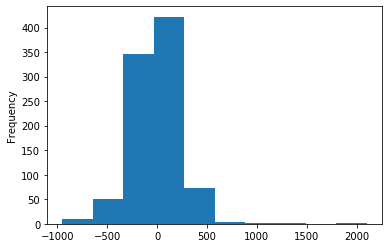

In [150]:
df["Change"].plot(kind = 'hist')

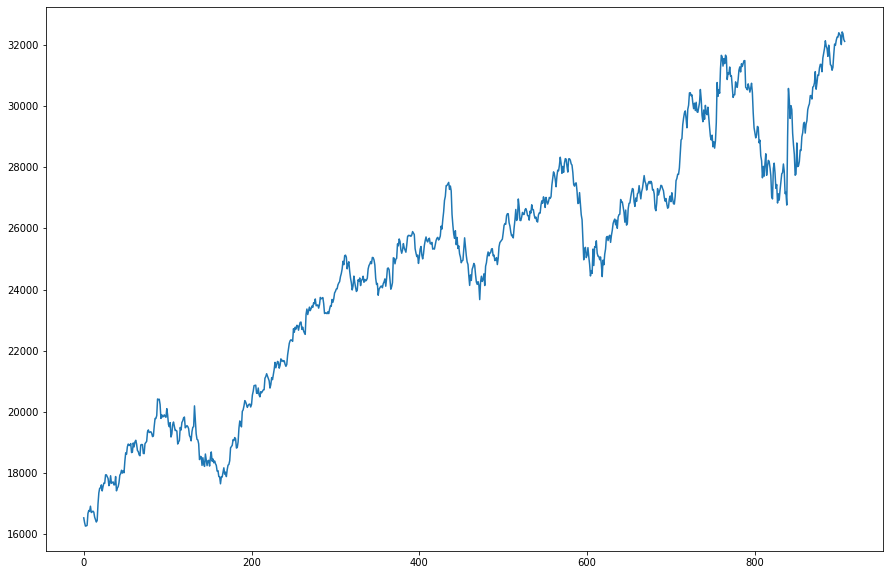

In [20]:
plt.figure(figsize=(15,10))
plt.plot(df['Close'])

In [25]:
import seaborn as sns

<Figure size 720x720 with 0 Axes>

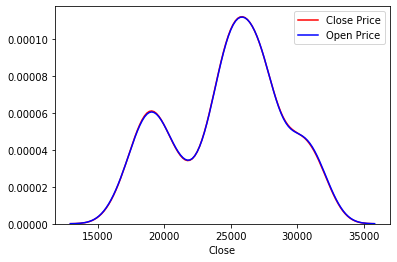

<Figure size 720x720 with 0 Axes>

In [28]:
ax1 = sns.distplot(df['Close'], hist = False, color='r', label= 'Close Price')
sns.distplot(df[['Open']], hist= False, color= 'b',label = 'Open Price', ax= ax1)

<Figure size 720x720 with 0 Axes>

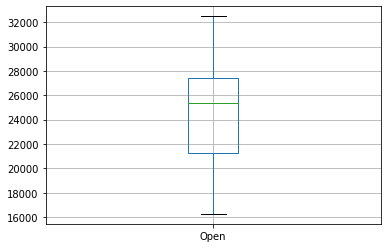

<Figure size 720x720 with 0 Axes>

In [35]:
df[['Open']].boxplot()
plt.figure(figsize=(10,10))

In [37]:
#Lets see how correlated the open and close price are.??
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Open'], df['Close'])
print(pearson_coef)
print('')
print(p_value)

0.998377259492571

0.0


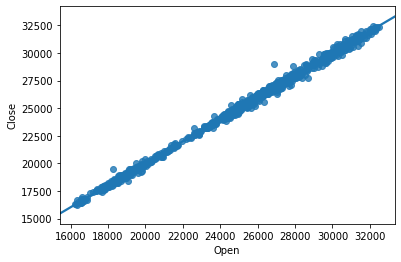

In [36]:
sns.regplot(x = df['Open'], y = df['Close'], data = df)

In [154]:
#lets see the data
df.head(10)

,Date,Open,High,Low,Close,Change,Trend
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,-71.00,Bearish
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,-182.05,Bearish
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,-45.85,Bearish
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,-11.40,Bearish
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,32.15,Bullish
5,2016-05-09,16357.00,16712.90,16357.00,16686.10,329.10,Bullish
6,2016-05-10,16710.05,16812.20,16613.90,16784.95,74.90,Bullish
7,2016-05-11,16544.25,16861.95,16518.75,16754.45,210.20,Bullish
8,2016-05-12,16881.25,16962.00,16779.50,16923.70,42.45,Bullish
9,2016-05-13,16891.70,16891.70,16594.55,16716.90,-174.80,Bearish


In [70]:
#Now we want to know how many time the market open with Gap up and Gap Down
e = df.ix[1,0]

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [72]:
type(e)

str

In [49]:
r = df[['Date','Open', 'Close', 'Change']]

In [73]:
r

32102.9

In [56]:
df.shape[0]#number of rows

908

In [74]:
for i in range(0,df.shape[0]):
    p = df.iloc[i]['Close']
    print(p)
    


16543.0
16388.7
16274.25
16281.0
16296.6
16686.1
16784.95
16754.45
16923.7
16716.9
16737.55
16762.75
16728.95
16565.25
16481.45
16407.55
16456.65
16997.45
17359.3
17511.8
17520.65
17620.9
17423.45
17567.8
17680.8
17671.4
17948.15
17946.8
17887.7
17828.6
17593.95
17672.4
17917.9
17671.3
17696.05
17718.6
17619.1
17626.05
17892.45
17426.05
17514.95
17561.55
17689.9
17935.4
17985.65
18097.65
18004.25
18084.9
18016.25
18390.95
18667.6
18618.95
18863.75
18953.65
18923.4
18905.15
18968.2
18674.3
18690.4
18989.6
18860.85
19021.95
19076.55
18953.15
18740.6
18708.25
18602.0
18571.7
18925.95
18939.45
18933.3
18647.8
18640.4
18963.7
19002.15
19041.25
19352.8
19414.7
19330.25
19341.65
19355.6
19304.25
19195.75
19217.0
19531.55
19787.6
19788.85
19883.2
20426.2
20406.9
20417.25
20245.3
19790.6
19909.15
19837.55
19855.45
19906.85
19852.3
19828.45
20109.6
19901.8
19591.75
19518.7
19653.55
19183.65
19285.7
19589.05
19672.7
19536.85
19395.05
19400.1
19378.55
18954.25
19020.15
19070.4
19495.05
19412.1
196

In [64]:
type(r)

numpy.float64

In [76]:
print(p)

32102.9


In [77]:
t = df['Open']

In [78]:
t

0      16614.00
1      16570.75
2      16320.10
3      16292.40
4      16264.45
         ...   
903    32276.15
904    32142.50
905    32486.60
906    32345.95
907    32237.90
Name: Open, Length: 908, dtype: float64

In [79]:
type(t)

pandas.core.series.Series

In [85]:
t[1+1]

16320.1

In [80]:
y = df['Close']

In [91]:
y

0      16543.00
1      16388.70
2      16274.25
3      16281.00
4      16296.60
         ...   
903    31997.70
904    32412.35
905    32354.90
906    32161.65
907    32102.90
Name: Close, Length: 908, dtype: float64

In [90]:
df.head()

,Date,Open,High,Low,Close,Change,Gap
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,71.00,D
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,182.05,D
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,45.85,D
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,11.40,D
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,-32.15,D


In [96]:
for i in range(0 , df.shape[0]):
    if t[1+i] == y[i]:
        print('True')

KeyError: 908

In [93]:
df.head()

,Date,Open,High,Low,Close,Change,Gap
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,71.00,U
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,182.05,U
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,45.85,U
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,11.40,U
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,-32.15,U


In [94]:
df['Gap'].value_counts()

U    908
Name: Gap, dtype: int64

In [110]:
for i in range(907):
    if t[1+i] > y[i]:
        df['Gapp'] = 'u'
    else :
        df['Gapp']='d'
    



In [114]:
df.head(10)

,Date,Open,High,Low,Close,Change,Gap,Gapp
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,71.00,U,u
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,182.05,U,u
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,45.85,U,u
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,11.40,U,u
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,-32.15,U,u
5,2016-05-09,16357.00,16712.90,16357.00,16686.10,-329.10,U,u
6,2016-05-10,16710.05,16812.20,16613.90,16784.95,-74.90,U,u
7,2016-05-11,16544.25,16861.95,16518.75,16754.45,-210.20,U,u
8,2016-05-12,16881.25,16962.00,16779.50,16923.70,-42.45,U,u
9,2016-05-13,16891.70,16891.70,16594.55,16716.90,174.80,U,u


In [208]:
df["Open"][0]

16614.0

In [209]:
l = []
for i in range(907):
    if df['Open'][1+i] > df['Close'][i]:
        l.append('U')
    else :
        l.append('D')

In [116]:
df['Gapp'].value_counts()

u    908
Name: Gapp, dtype: int64

In [210]:
l

['U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'D',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D'

In [211]:
len(l)

907

In [214]:
i = l.count('U')

In [213]:
i

0

In [215]:
r = l.count('D')
print(r)
print('')
print(r+i)

293

907


In [127]:
#Conclusion:
#Outof 907 times the market Opend 614 time with a Gap UP
# 293 time with a Gap Down

In [128]:
df.head()

,Date,Open,High,Low,Close,Change,Gap,Gapp
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,71.00,U,u
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,182.05,U,u
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,45.85,U,u
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,11.40,U,u
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,-32.15,U,u


In [131]:
df.drop(['Gap'], axis = 1,inplace= True)

In [132]:
df.head()

,Date,Open,High,Low,Close,Change,Gapp
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,71.00,u
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,182.05,u
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,45.85,u
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,11.40,u
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,-32.15,u


In [133]:
df.drop(['Gapp'], axis = 1, inplace= True)

In [134]:
df.head()

,Date,Open,High,Low,Close,Change
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,71.00
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,182.05
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,45.85
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,11.40
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,-32.15


In [135]:
df['Change'][0]

71.0

In [137]:
# lets see if there is  any zero in 'Change' column
for i in range(0,df.shape[0]):
    if df['Change'][i] ==0 :
        print('t')
    

In [236]:
# So now it is confirm that there is either positive or negative value present in the column
#Now we make new colum showing the trend [1500 if x =='Music' else 800 for x in df['Event']]
df['Trend'] = ['Bullish' if x >0 else 'Bearish' for x in df['Change']]

In [237]:
df.head(20)

,Date,Open,High,Low,Close,Change,Trend
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,-71.00,Bearish
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,-182.05,Bearish
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,-45.85,Bearish
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,-11.40,Bearish
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,32.15,Bullish
5,2016-05-09,16357.00,16712.90,16357.00,16686.10,329.10,Bullish
6,2016-05-10,16710.05,16812.20,16613.90,16784.95,74.90,Bullish
7,2016-05-11,16544.25,16861.95,16518.75,16754.45,210.20,Bullish
8,2016-05-12,16881.25,16962.00,16779.50,16923.70,42.45,Bullish
9,2016-05-13,16891.70,16891.70,16594.55,16716.90,-174.80,Bearish


In [238]:
df['Trend'].value_counts()

Bearish    480
Bullish    428
Name: Trend, dtype: int64

In [239]:
df['Change'].describe()

count     908.000000
mean      -10.577698
std       232.514947
min      -950.050000
25%      -128.650000
50%       -11.450000
75%       105.275000
max      2102.900000
Name: Change, dtype: float64

In [157]:
df['Change'].max()

2102.899999999998

In [158]:
df[df['Change']== 2102.899999999998]

,Date,Open,High,Low,Close,Change,Trend
839,2019-09-20,26878.65,29418.95,26727.55,28981.55,2102.9,Bullish


In [172]:
# So on 20th Sept 2019 BankNifty was very bullish 

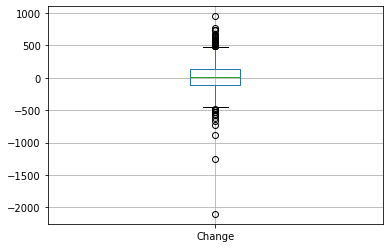

In [147]:
df[['Change']].boxplot()

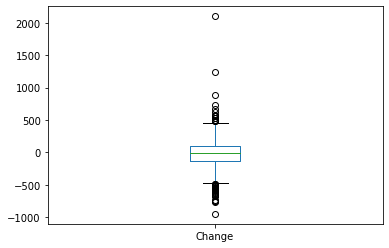

In [167]:
df['Change'].plot(kind = 'box' )

In [155]:
df['Change'].min()

-950.0500000000029

In [161]:
df['Trend'].value_counts()

Bearish    480
Bullish    428
Name: Trend, dtype: int64

In [162]:
# It is clear that there is more Bearish trend than Bullish 

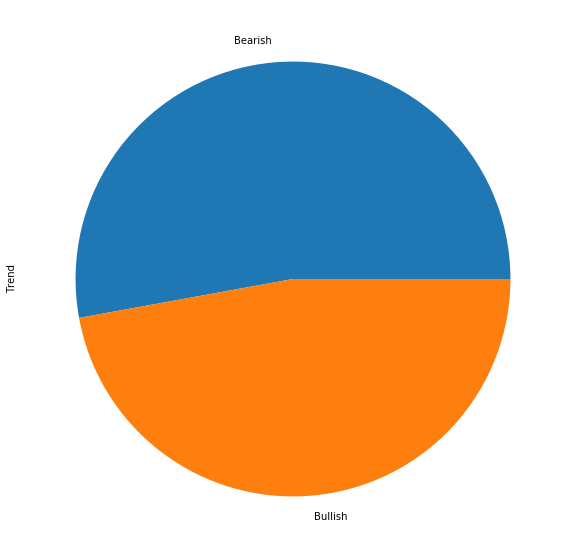

In [240]:
#Lets plt a pie chart of Trend Column
df['Trend'].value_counts().plot(kind= 'pie', figsize = (10,10))

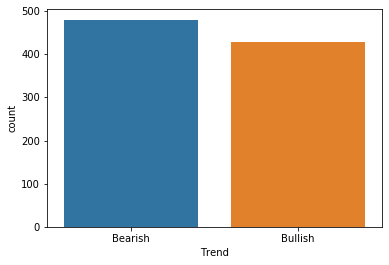

In [241]:
sns.countplot(x = 'Trend', data = df)

In [173]:
l

['t',
 'f',
 't',
 'f',
 't',
 't',
 'f',
 't',
 'f',
 't',
 't',
 'f',
 'f',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 'f',
 'f',
 't',
 't',
 'f',
 't',
 'f',
 't',
 'f',
 't',
 'f',
 'f',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 'f',
 't',
 'f',
 'f',
 't',
 't',
 'f',
 'f',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 'f',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 'f',
 't',
 't',
 't',
 'f',
 't',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 't',
 'f',
 'f',
 'f',
 't',
 't',
 'f',
 'f',
 't',
 't',
 't',
 'f',
 't',
 'f',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 'f',
 't',
 'f',
 't',
 't',
 't',
 'f',
 'f',
 't',
 't',
 't',
 't',
 'f',
 'f',
 't',
 'f',
 't',
 'f',
 't',
 't',
 'f',
 'f',
 'f',
 't',
 't',
 'f',
 'f'

In [174]:
len(l)

907

In [242]:
df.head(10)

,Date,Open,High,Low,Close,Change,Trend
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,-71.00,Bearish
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,-182.05,Bearish
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,-45.85,Bearish
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,-11.40,Bearish
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,32.15,Bullish
5,2016-05-09,16357.00,16712.90,16357.00,16686.10,329.10,Bullish
6,2016-05-10,16710.05,16812.20,16613.90,16784.95,74.90,Bullish
7,2016-05-11,16544.25,16861.95,16518.75,16754.45,210.20,Bullish
8,2016-05-12,16881.25,16962.00,16779.50,16923.70,42.45,Bullish
9,2016-05-13,16891.70,16891.70,16594.55,16716.90,-174.80,Bearish


In [191]:
l[1]

't'

In [192]:
l[0]

0

In [193]:
l.insert(0,0)

In [197]:
l[1]

0

In [198]:
l.pop(0)

0

In [199]:
l.pop(1)

't'

In [200]:
l

[0,
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',
 't',


In [201]:
l[0]

0

In [202]:
l[1]

't'

In [203]:
l[2]

't'

In [204]:
for i in range(10):
    print(l[i])

0
t
t
t
t
t
t
t
t
t


In [216]:
l[0]

'U'

In [217]:
for i in range(20):
    print(l[i])

U
D
U
D
U
U
D
U
D
U
U
D
D
U
U
U
U
U
D
U


In [218]:
r = l.copy()

In [219]:
r 

['U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'D',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D'

In [220]:
r.insert(0, 'Null')

In [221]:
r[0]

'Null'

In [222]:
r[1]

'U'

In [223]:
r

['Null',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'D',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 

In [224]:
m = r.copy()

In [225]:
m

['Null',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'D',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'U',
 'U',
 'U',
 'D',
 'D',
 'U',
 'D',
 'U',
 'D',
 'U',
 'U',
 'D',
 'D',
 'D',
 'U',
 'U',
 

In [243]:
from pandas import DataFrame
d= DataFrame (m,columns=['Gap'])

In [245]:
d.head()

,Gap
0,Null
1,U
2,D
3,U
4,D


In [246]:
df= pd.concat([df,d], axis = 1)

In [247]:
df.head()

,Date,Open,High,Low,Close,Change,Trend,Gap
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,-71.00,Bearish,Null
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,-182.05,Bearish,U
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,-45.85,Bearish,D
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,-11.40,Bearish,U
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,32.15,Bullish,D


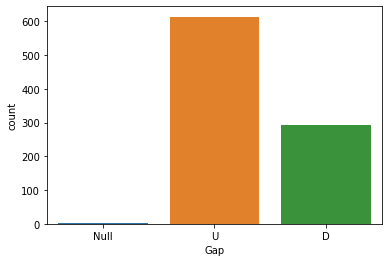

In [248]:
sns.countplot(x = 'Gap', data = df)

In [249]:
df['Gap'].value_counts()

U       614
D       293
Null      1
Name: Gap, dtype: int64

In [250]:
#Now lets groupby the columns Trend and Gap
# It will show how many time the market opend with Gap Up and was bullish or opend Gapdown and was bearish 

In [255]:
d  = df[['Trend', 'Gap']].groupby('Gap').count()

In [256]:
d

,Trend
Gap,
D,293
Null,1
U,614


In [257]:
df.groupby(by=['Trend','Gap'], as_index=False).count()

,Trend,Gap,Date,Open,High,Low,Close,Change
0,Bearish,D,162,162,162,162,162,162
1,Bearish,Null,1,1,1,1,1,1
2,Bearish,U,317,317,317,317,317,317
3,Bullish,D,131,131,131,131,131,131
4,Bullish,U,297,297,297,297,297,297


In [258]:
body = pd.DataFrame({'make':['alfa-romeo','alfa-romeo','alfa-romeo','audi','audi'], 'body-style':['convertible','convertible','hatchback','sedan','sedan']})


In [259]:
body

,make,body-style
0,alfa-romeo,convertible
1,alfa-romeo,convertible
2,alfa-romeo,hatchback
3,audi,sedan
4,audi,sedan


In [260]:
body.groupby(by=['make','body-style'], as_index=False).count()

IndexError: list index out of range

In [261]:
 body.groupby(['make','body-style']).size().reset_index(name='count')

,make,body-style,count
0,alfa-romeo,convertible,2
1,alfa-romeo,hatchback,1
2,audi,sedan,2


In [268]:
r =  df.groupby(['Gap','Trend']).size().reset_index(name='count')

In [269]:
r

,Gap,Trend,count
0,D,Bearish,162
1,D,Bullish,131
2,Null,Bearish,1
3,U,Bearish,317
4,U,Bullish,297


In [265]:
type(r)

pandas.core.frame.DataFrame

In [266]:
r.columns

Index(['Trend', 'Gap', 'count'], dtype='object')

In [267]:
r.shape

(5, 3)

In [272]:
# So this shows that there can be no theory that if the market Opend with Gapup will be Bullish, it can be either 
#Bullish or Bearish and same goes with Gap Down. 

In [274]:
df.head()

,Date,Open,High,Low,Close,Change,Trend,Gap
0,2016-05-02,16614.00,16674.15,16519.55,16543.00,-71.00,Bearish,Null
1,2016-05-03,16570.75,16719.40,16358.40,16388.70,-182.05,Bearish,U
2,2016-05-04,16320.10,16465.60,16250.50,16274.25,-45.85,Bearish,D
3,2016-05-05,16292.40,16398.25,16193.70,16281.00,-11.40,Bearish,U
4,2016-05-06,16264.45,16346.25,16186.25,16296.60,32.15,Bullish,D


In [275]:
# Now Save this new Dataset
df.to_csv('UpdatedBankniftyNew.csv')

In [277]:
#Load the new saved csv file to have a look
n = pd.read_csv('UpdatedBankniftyNew.csv')

In [278]:
n.head()

,Unnamed: 0,Date,Open,High,Low,Close,Change,Trend,Gap
0,0,2016-05-02,16614.00,16674.15,16519.55,16543.00,-71.00,Bearish,Null
1,1,2016-05-03,16570.75,16719.40,16358.40,16388.70,-182.05,Bearish,U
2,2,2016-05-04,16320.10,16465.60,16250.50,16274.25,-45.85,Bearish,D
3,3,2016-05-05,16292.40,16398.25,16193.70,16281.00,-11.40,Bearish,U
4,4,2016-05-06,16264.45,16346.25,16186.25,16296.60,32.15,Bullish,D


In [281]:
# So it is correct